In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

IMDB_movies = "IMDb_movies.csv"
movies_data_raw = pd.read_csv(IMDB_movies)

In [3]:
movies_data_raw.shape

(81273, 22)

In [4]:
movies_data_raw.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [5]:
movies_data = movies_data_raw.set_index(['title'])
movies_data_reduced = movies_data_raw[['title',  'avg_vote', 'metascore', 'reviews_from_users', 'reviews_from_critics', 'year']]
movies_data_reduced.head()

,title,avg_vote,metascore,reviews_from_users,reviews_from_critics,year
0,The Story of the Kelly Gang,6.1,NaN,7.0,7.0,1906
1,Den sorte drøm,5.9,NaN,4.0,2.0,1911
2,Cleopatra,5.2,NaN,24.0,3.0,1912
3,L'Inferno,7.0,NaN,28.0,14.0,1911
4,"From the Manger to the Cross; or, Jesus of Naz...",5.7,NaN,12.0,5.0,1912


In [6]:
movies_data_reduced.count()

title                   81273
avg_vote                81273
metascore               12722
reviews_from_users      74196
reviews_from_critics    70286
year                    81273
dtype: int64

In [7]:
movies_data= movies_data_reduced.dropna(how='any')
movies_data.count()

title                   12662
avg_vote                12662
metascore               12662
reviews_from_users      12662
reviews_from_critics    12662
year                    12662
dtype: int64

In [8]:
#CALCULATE SUMARY STATS ABOUT FILM QUALITY---------------------------------------------
review_data = movies_data[['title',  'avg_vote', 'metascore']]

reviews_mean = round(review_data.mean(),2)
reviews_median = round(review_data.median(),2)
reviews_variance = round(review_data.var(),2)
reviews_stddev = round(review_data.std(),2)
reviews_SEM = round(review_data.sem(),2)

#CREATE DATAFRAME---------------------------------------------------------------------
reviews_summary = pd.DataFrame({"Mean Rating": reviews_mean,
                              "Median Rating": reviews_median,
                              "Rating Variance": reviews_variance,
                              "Rating Std Dev": reviews_stddev,
                              "Rating SEM": reviews_SEM})

reviews_summary

<ipython-input-8-2ff38ad15f39>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  reviews_mean = round(review_data.mean(),2)
<ipython-input-8-2ff38ad15f39>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  reviews_median = round(review_data.median(),2)
<ipython-input-8-2ff38ad15f39>:6: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only 

,Mean Rating,Median Rating,Rating Variance,Rating Std Dev,Rating SEM
avg_vote,6.35,6.4,0.95,0.97,0.01
metascore,55.77,56.0,314.90,17.75,0.16


In [9]:
reviews_volume = movies_data[['reviews_from_users', 'reviews_from_critics']]

vol_total = reviews_volume.sum()
vol_means = round(reviews_volume.mean(),2)
vol_medians = round(reviews_volume.median(),2)
vol_variance = round(reviews_volume.var(),2)
vol_stddev = round(reviews_volume.std(),2)
vol_SEM = round(reviews_volume.sem(),2)

#CREATE DATAFRAME---------------------------------------------------------------------
reviews_volume_stats = pd.DataFrame({"Total # of Reviews": vol_total,
                                     "Mean # of Reviews": vol_means,
                                     "Median # of Reviews": vol_medians ,
                                     "Reviews Volume Variance": vol_variance,
                                     "Reviews Volume Std Dev": vol_stddev,
                                     "Reviews Volume SEM": vol_SEM})

reviews_volume_stats

,Total # of Reviews,Mean # of Reviews,Median # of Reviews,Reviews Volume Variance,Reviews Volume Std Dev,Reviews Volume SEM
reviews_from_users,2269464.0,179.23,71.0,122881.87,350.55,3.12
reviews_from_critics,1286996.0,101.64,66.0,11274.84,106.18,0.94


In [10]:
ave_vote = movies_data['avg_vote']
metascore = movies_data['metascore']

ave_vote_quartiles = ave_vote.quantile([.25,.5,.75])
ave_vote_lowerq = ave_vote_quartiles[0.25]
ave_vote_upperq = ave_vote_quartiles[0.75]
ave_vote_iqr = ave_vote_upperq-ave_vote_lowerq
ave_vote_lower_bound = ave_vote_lowerq - (1.5*ave_vote_iqr)
ave_vote_upper_bound = ave_vote_upperq + (1.5*ave_vote_iqr)

metascore_quartiles = metascore.quantile([.25,.5,.75])
metascore_lowerq = metascore_quartiles[0.25]
metascore_upperq = metascore_quartiles[0.75]
metascore_iqr = metascore_upperq-metascore_lowerq
metascore_lower_bound = metascore_lowerq - (1.5*metascore_iqr)
metascore_upper_bound = metascore_upperq + (1.5*metascore_iqr)

print(f"Lower Quartile of Viewer Reviews: {round(ave_vote_lowerq,2)}")
print(f"Upper Quartile of Viewer Reviews: {round(ave_vote_upperq,2)}")
print(f"Viewer Review IQR: {round(ave_vote_iqr,2)}")
print(f"Outliers: below {round(ave_vote_lower_bound,2)} or above {round(ave_vote_upper_bound,2)}")
print("--------------------------------------------------------------------------")
print(f"Lower Quartile of Critic Metascores: {round(metascore_lowerq,2)}")
print(f"Upper Quartile of Critic Metascores: {round(metascore_upperq,2)}")
print(f"Critic Metascore IQR: {round(metascore_iqr,2)}")
print(f"Outliers: below {round(metascore_lower_bound,2)} or above {round(metascore_upper_bound,2)}")

Lower Quartile of Viewer Reviews: 5.8
Upper Quartile of Viewer Reviews: 7.0
Viewer Review IQR: 1.2
Outliers: below 4.0 or above 8.8
--------------------------------------------------------------------------
Lower Quartile of Critic Metascores: 43.0
Upper Quartile of Critic Metascores: 69.0
Critic Metascore IQR: 26.0
Outliers: below 4.0 or above 108.0


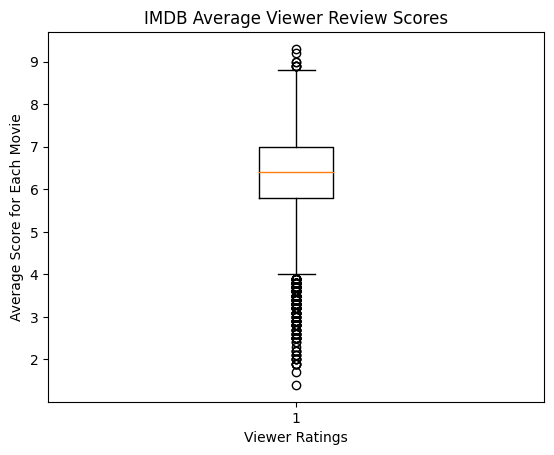

In [11]:
fig1, ax1 = plt.subplots()
ax1.set_title('IMDB Average Viewer Review Scores')
ax1.set_ylabel('Average Score for Each Movie')
ax1.set_xlabel('Viewer Ratings')
ax1.boxplot(ave_vote)
plt.show()

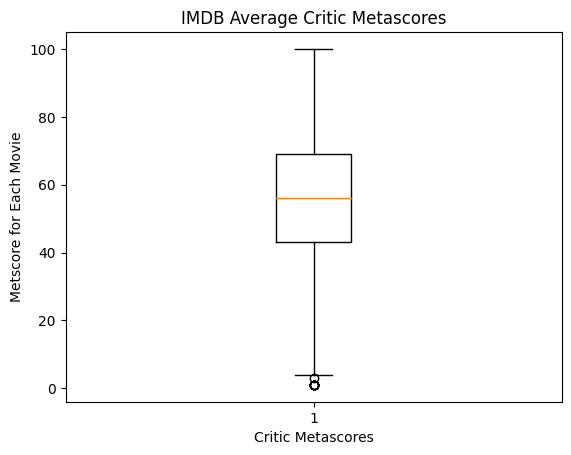

In [12]:
fig1, ax1 = plt.subplots()
ax1.set_title('IMDB Average Critic Metascores')
ax1.set_ylabel('Metscore for Each Movie')
ax1.set_xlabel('Critic Metascores')
ax1.boxplot(metascore)
plt.show()

The r-squared is: 0.6930274308647506


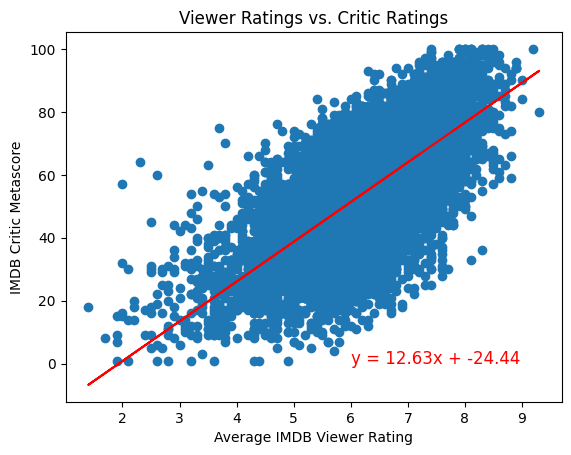

In [13]:
# DEPENDENCIES --------------------------------------------------------------
from scipy.stats import linregress

# CALCULATE VARIABLES--------------------------------------------------------
review_data_by_title = review_data.set_index(['title'])
ave_vote = review_data_by_title['avg_vote']
metascore = review_data_by_title['metascore']

# PLOT GRAPH-----------------------------------------------------------------
x_values = ave_vote
y_values = metascore
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=12,color="red")
plt.title('Viewer Ratings vs. Critic Ratings')
plt.xlabel('Average IMDB Viewer Rating')
plt.ylabel('IMDB Critic Metascore')
print(f"The r-squared is: {rvalue}")
plt.show()

In [14]:
earliest_film = movies_data['year'].min()
earliest_film

1916

In [15]:
most_recent_film = movies_data['year'].max()
most_recent_film

2019

In [16]:
#CREATE BINS BY DECADE ----------------------------------------------------
decade = [1910, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019]
decade_names = ["1910s", "1920s", "1930s", "1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s"]

movies_data["Decade"] = pd.cut(movies_data["year"], decade, labels=decade_names)

<ipython-input-16-1bc685d660f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data["Decade"] = pd.cut(movies_data["year"], decade, labels=decade_names)


In [17]:
# GROUPBY DECADE BINS---------------------------------------------------------------------------------------------
decade_group = movies_data.groupby('Decade')
number_of_movies = decade_group["year"].count()
print(number_of_movies)

# CALCULATE DECADE STATS---------------------------------------------------------------------------------------------
decade_summary = decade_group[["avg_vote", "metascore", "reviews_from_users", "reviews_from_critics"]].mean()

# FORMAT OUTPUTS----------------------------------------------------------------------------------------------------
decade_summary["avg_vote"] = decade_summary["avg_vote"].map("{:.2f}".format)
decade_summary["metascore"] = decade_summary["metascore"].map("{:.2f}".format)
decade_summary["reviews_from_users"] = decade_summary["reviews_from_users"].map("{:.2f}".format)
decade_summary["reviews_from_critics"] = decade_summary["reviews_from_critics"].map("{:.2f}".format)

# ADD A COLUMN FOR NUMBER OF MOVIES IN IMDB FOR EACH DECADE---------------------------------------------------------
decade_summary["Number of Movies"]= number_of_movies

# RELABEL DATAFRAME COLUMNS-----------------------------------------------------------------------------------------
decade_summary_renamed = decade_summary.rename(columns={"avg_vote":"Average Viewer Rating", "metascore":"Average Critic Metascore", "reviews_from_users":"Ave # Viewer Reviews per movie", "reviews_from_critics":"Ave # Critic Reviews per movie"})

decade_summary_renamed

Decade
1910s       1
1920s       4
1930s      25
1940s      39
1950s      89
1960s     208
1970s     400
1980s     880
1990s    1403
2000s    4050
2010s    5563
Name: year, dtype: int64


,Average Viewer Rating,Average Critic Metascore,Ave # Viewer Reviews per movie,Ave # Critic Reviews per movie,Number of Movies
Decade,,,,,
1910s,7.80,93.00,105.00,77.00,1
1920s,7.55,85.75,231.00,83.75,4
1930s,7.60,87.40,252.24,100.92,25
1940s,7.58,84.95,253.51,92.92,39
1950s,7.64,81.33,200.39,85.40,89
1960s,7.32,72.80,182.25,74.41,208
1970s,6.93,65.12,176.79,77.35,400
1980s,6.51,55.06,154.97,69.39,880
1990s,6.54,56.70,209.16,68.63,1403


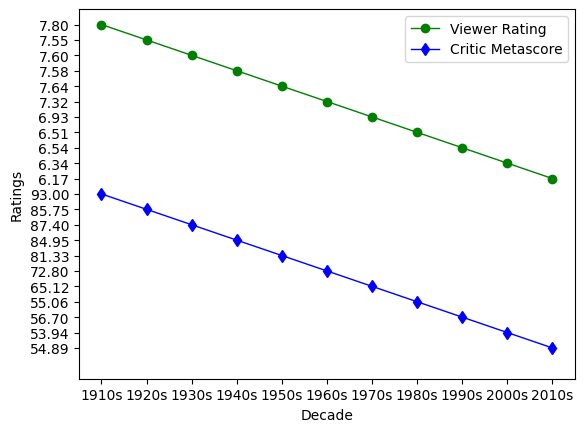

In [18]:
# CREATE VARIABLES FOR LINE GRAPH--------------------------------------
viewerrating = decade_summary_renamed["Average Viewer Rating"]
criticratings = decade_summary_renamed["Average Critic Metascore"]

# PLOT GRAPH-----------------------------------------------------------
Viewer_Ratings, = plt.plot(decade_names, viewerrating, marker="o",color="green", linewidth=1, label="Viewer Rating")
Critic_Ratings, = plt.plot(decade_names, criticratings, marker="d",color="blue", linewidth=1, label="Critic Metascore")

plt.legend(handles=[Viewer_Ratings, Critic_Ratings], loc="best")
plt.xlabel("Decade")
plt.ylabel("Ratings")
plt.ylim((23,-1))
plt.show()

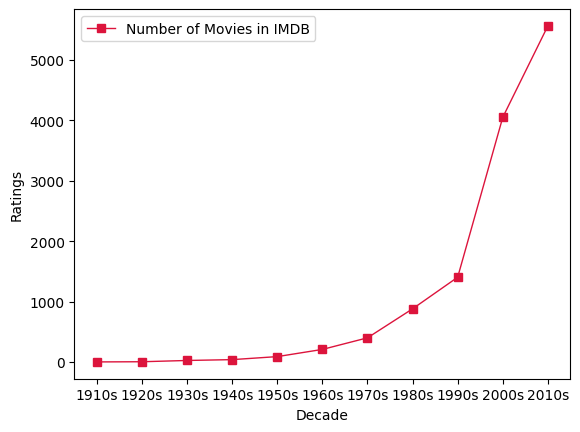

In [19]:
movieslisted = decade_summary_renamed["Number of Movies"]
Movies_Listed, = plt.plot(decade_names, movieslisted, marker="s",color="crimson", linewidth=1, label="Number of Movies in IMDB")
plt.legend(handles=[Movies_Listed], loc="best")
plt.xlabel("Decade")
plt.ylabel("Ratings")
plt.show()

In [20]:
# IDENTIFY TOP 100 MOVIES BY VIEWER RATINGS ----------------------------------------
movies_data_viewers_descending = movies_data.sort_values("avg_vote", ascending=False)
viewer_best_unlabeled = movies_data_viewers_descending.head(100)
viewer_best = viewer_best_unlabeled.rename(columns={"avg_vote":"Average Viewer Rating", "metascore":"Average Critic Metascore", "reviews_from_users":"# Viewer Reviews", "reviews_from_critics":"# Critic Reviews"})

viewer_best.head()

,title,Average Viewer Rating,Average Critic Metascore,# Viewer Reviews,# Critic Reviews,year,Decade
27628,The Shawshank Redemption,9.3,80.0,7029.0,224.0,1994,1990s
14943,The Godfather,9.2,100.0,3362.0,241.0,1972,1970s
15954,The Godfather: Part II,9.0,90.0,857.0,172.0,1974,1970s
46756,The Dark Knight,9.0,84.0,6344.0,418.0,2008,2000s
26817,Schindler's List,8.9,94.0,1642.0,221.0,1993,1990s


In [21]:
# CALCULATE AVERAGES FOR VIEWER TOP 100--------------------------------------------
viewer_best_avescore = viewer_best["Average Viewer Rating"].mean()
viewer_best_metascore = viewer_best["Average Critic Metascore"].mean()
viewer_best_viewernum = viewer_best["# Viewer Reviews"].mean()
viewer_best_criticnum = viewer_best["# Critic Reviews"].mean()
viewer_best_aveyear = viewer_best["year"].mean()

# CREATE DATAFRAME ---------------------------------------------------------------
viewer_best_summary = pd.DataFrame({"Average Viewer Rating": [viewer_best_avescore],
                                  "Average Metascore": [viewer_best_metascore],
                                  "Average # Viewer Reviews per movie": [viewer_best_viewernum],
                                  "Average # Critic Reviews per movie": [viewer_best_criticnum],
                                  "Average Year of Release": [viewer_best_aveyear]})

viewer_best_summary

,Average Viewer Rating,Average Metascore,Average # Viewer Reviews per movie,Average # Critic Reviews per movie,Average Year of Release
0,8.525,81.76,1444.18,245.75,1990.8


In [22]:
# IDENTIFY TOP 100 MOVIES BY CRITIC METASCORE ----------------------------------------
movies_data_critics_descending = movies_data.sort_values("metascore", ascending=False)
critic_best_unlabeled = movies_data_critics_descending.head(100)
critic_best = critic_best_unlabeled.rename(columns={"avg_vote":"Average Viewer Rating", "metascore":"Average Critic Metascore", "reviews_from_users":"# Viewer Reviews", "reviews_from_critics":"# Critic Reviews"})

critic_best.head()

,title,Average Viewer Rating,Average Critic Metascore,# Viewer Reviews,# Critic Reviews,year,Decade
8912,Sweet Smell of Success,8.1,100.0,143.0,127.0,1957,1950s
3277,The Wizard of Oz,8.0,100.0,641.0,160.0,1939,1930s
51644,Boyhood,7.9,100.0,949.0,576.0,2014,2010s
12019,Au hasard Balthazar,7.9,100.0,77.0,109.0,1966,1960s
7738,Rear Window,8.4,100.0,759.0,145.0,1954,1950s


In [23]:
# IDENTIFY BOTTOM 100 MOVIES BY VIEWER RATINGS ----------------------------------------
movies_data_viewers_ascending = movies_data.sort_values("avg_vote", ascending=True)
viewer_worst_unlabeled = movies_data_viewers_ascending.head(100)
viewer_worst = viewer_worst_unlabeled.rename(columns={"avg_vote":"Average Viewer Rating", "metascore":"Average Critic Metascore", "reviews_from_users":"# Viewer Reviews", "reviews_from_critics":"# Critic Reviews"})

viewer_worst.head()

,title,Average Viewer Rating,Average Critic Metascore,# Viewer Reviews,# Critic Reviews,year,Decade
70807,Saving Christmas,1.4,18.0,156.0,27.0,2014,2010s
37709,The Price of Air,1.7,8.0,6.0,14.0,2000,2000s
38202,Superbabies: Baby Geniuses 2,1.9,9.0,127.0,36.0,2004,2000s
53363,Disaster Movie,1.9,15.0,399.0,110.0,2008,2000s
40967,The Singing Forest,1.9,1.0,36.0,4.0,2003,2000s


In [24]:
# CALCULATE AVERAGES FOR VIEWER BOTTOM 100--------------------------------------------
viewer_worst_avescore = viewer_worst["Average Viewer Rating"].mean()
viewer_worst_metascore = viewer_worst["Average Critic Metascore"].mean()
viewer_worst_viewernum = viewer_worst["# Viewer Reviews"].mean()
viewer_worst_criticnum = viewer_worst["# Critic Reviews"].mean()
viewer_worst_aveyear = viewer_worst["year"].mean()

# CREATE DATAFRAME-------------------------------------------------------------------
viewer_worst_summary = pd.DataFrame({"Average Viewer Rating": [viewer_worst_avescore],
                                  "Average Metascore": [viewer_worst_metascore],
                                  "Average # Viewer Reviews per movie": [viewer_worst_viewernum],
                                  "Average # Critic Reviews per movie": [viewer_worst_criticnum],
                                  "Average Year of Release": [viewer_worst_aveyear]})

viewer_worst_summary

,Average Viewer Rating,Average Metascore,Average # Viewer Reviews per movie,Average # Critic Reviews per movie,Average Year of Release
0,2.812,22.72,152.69,46.77,2007.04


In [25]:
# IDENTIFY BOTTOM 100 MOVIES BY CRITIC METASCORE ----------------------------------------
movies_data_critics_ascending = movies_data.sort_values("metascore", ascending=True)
critic_worst_unlabeled = movies_data_critics_ascending.head(100)
critic_worst = critic_worst_unlabeled.rename(columns={"avg_vote":"Average Viewer Rating", "metascore":"Average Critic Metascore", "reviews_from_users":"# Viewer Reviews", "reviews_from_critics":"# Critic Reviews"})

critic_worst.head()

,title,Average Viewer Rating,Average Critic Metascore,# Viewer Reviews,# Critic Reviews,year,Decade
28688,Bio-Dome,4.4,1.0,141.0,29.0,1996,1990s
66310,United Passions,2.1,1.0,32.0,9.0,2014,2010s
59421,InAPPropriate Comedy,2.8,1.0,49.0,22.0,2013,2010s
61419,10 Rules for Sleeping Around,3.6,1.0,8.0,14.0,2013,2010s
22467,The Garbage Pail Kids Movie,2.6,1.0,116.0,43.0,1987,1980s


In [26]:
# CALCULATE AVERAGES FOR CRITIC BOTTOM 100--------------------------------------------
critic_worst_avescore = critic_worst["Average Viewer Rating"].mean()
critic_worst_metascore = critic_worst["Average Critic Metascore"].mean()
critic_worst_viewernum = critic_worst["# Viewer Reviews"].mean()
critic_worst_criticnum = critic_worst["# Critic Reviews"].mean()
critic_worst_aveyear = critic_worst["year"].mean()

# CREATE DATAFRAME -------------------------------------------------------------------
critic_worst_summary = pd.DataFrame({"Average Viewer Rating": [critic_worst_avescore],
                                  "Average Metascore": [critic_worst_metascore],
                                  "Average # Viewer Reviews per movie": [critic_worst_viewernum],
                                  "Average # Critic Reviews per movie": [critic_worst_criticnum],
                                  "Average Year of Release": [critic_worst_aveyear]})

critic_worst_summary

,Average Viewer Rating,Average Metascore,Average # Viewer Reviews per movie,Average # Critic Reviews per movie,Average Year of Release
0,4.086,8.99,131.52,46.9,2004.52


In [28]:
# IMPORT DATA----------------------------------------------------------
IMDB_ratings = "IMDb_ratings.csv"
ratings_data_raw = pd.read_csv(IMDB_ratings)
ratings_data_raw.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000574,6.1,537,6.3,6.0,54,17,55,121,122,...,6.0,19.0,6.6,14.0,6.3,64.0,6.0,89.0,6.2,309.0
1,tt0001892,5.9,171,6.1,6.0,5,6,17,41,52,...,5.8,4.0,6.5,8.0,5.9,29.0,6.2,27.0,6.0,114.0
2,tt0002101,5.2,420,5.2,5.0,12,8,16,60,89,...,5.5,14.0,6.2,20.0,4.9,57.0,5.5,197.0,4.7,103.0
3,tt0002130,7.0,2019,6.9,7.0,194,208,386,571,308,...,7.3,74.0,7.4,75.0,7.0,126.0,7.1,452.0,7.0,1076.0
4,tt0002199,5.7,438,5.8,6.0,28,15,42,75,114,...,4.8,10.0,6.5,15.0,5.7,56.0,5.9,161.0,5.7,164.0


In [29]:
ratings_data_raw.shape

(81273, 49)

In [30]:
ratings_data_raw.columns

Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       

In [31]:
#CALCULATE OVERALL AVERAGE VOTES BY GENDER -----------------------------
overall_rating = ratings_data_raw['weighted_average_vote']
mean_females_rating = ratings_data_raw['females_allages_avg_vote']
mean_males_rating = ratings_data_raw['males_allages_avg_vote']
ratingslists_by_gender = pd.DataFrame({"Ave Rating Overall": overall_rating,
                                       "Ave Female Rating": mean_females_rating,
                                       "Ave Male Rating": mean_males_rating})

ratings_by_gender = ratingslists_by_gender.mean()
round(ratings_by_gender,2)

Ave Rating Overall    5.93
Ave Female Rating     6.06
Ave Male Rating       5.85
dtype: float64

In [32]:
# CALCULATE MEANS FOR RATINGS, DIVIDED BY GENDER, SEPARATED BY AGES RANGE----------
allgenders_ratings = ratings_data_raw[['allgenders_0age_avg_vote', 'allgenders_18age_avg_vote', 'allgenders_30age_avg_vote', 'allgenders_45age_avg_vote']]
allgenders_ratings_ave = allgenders_ratings.mean()

females_ratings = ratings_data_raw[['females_0age_avg_vote', 'females_18age_avg_vote', 'females_30age_avg_vote', 'females_45age_avg_vote']]
females_ratings_ave = females_ratings.mean()

males_ratings = ratings_data_raw[['males_0age_avg_vote', 'males_18age_avg_vote', 'males_30age_avg_vote', 'males_45age_avg_vote']]
males_ratings_ave = males_ratings.mean()

# CREATE DATAFRAMES FOR GENDER & AGE BREAKDOWNS-----------------------------------
allgender_ratings_ages = pd.DataFrame({"Ave Overall": allgenders_ratings_ave})
females_ratings_ages = pd.DataFrame({"Ave Females": females_ratings_ave})
males_ratings_ages = pd.DataFrame({"Ave Males": males_ratings_ave})

# RESET INDEXES FOR EACH DATAFRAME TO MATCH EACHOTHER------------------------------
allgender_ages_indexed = allgender_ratings_ages.rename(index={'allgenders_0age_avg_vote': 'Ages 0-17','allgenders_18age_avg_vote':'Ages 18-29','allgenders_30age_avg_vote':'Ages 30-44', 'allgenders_45age_avg_vote':'Ages 45+'})
female_ages_indexed = females_ratings_ages.rename(index={'females_0age_avg_vote': 'Ages 0-17','females_18age_avg_vote':'Ages 18-29','females_30age_avg_vote':'Ages 30-44', 'females_45age_avg_vote':'Ages 45+'})
male_ages_indexed = males_ratings_ages.rename(index={'males_0age_avg_vote': 'Ages 0-17','males_18age_avg_vote':'Ages 18-29','males_30age_avg_vote':'Ages 30-44', 'males_45age_avg_vote':'Ages 45+'})

# CREATE NEW COMBINED DATAFRAME----------------------------------------------------
gender_ratings_by_age = round(allgender_ages_indexed, 2)
gender_ratings_by_age["Female Ave Rating"] = round(female_ages_indexed, 2)
gender_ratings_by_age["Male Ave Rating"] = round(male_ages_indexed, 2)

gender_ratings_by_age

,Ave Overall,Female Ave Rating,Male Ave Rating
Ages 0-17,6.59,6.85,6.58
Ages 18-29,6.04,6.26,6.00
Ages 30-44,5.88,6.10,5.84
Ages 45+,5.69,6.06,5.64


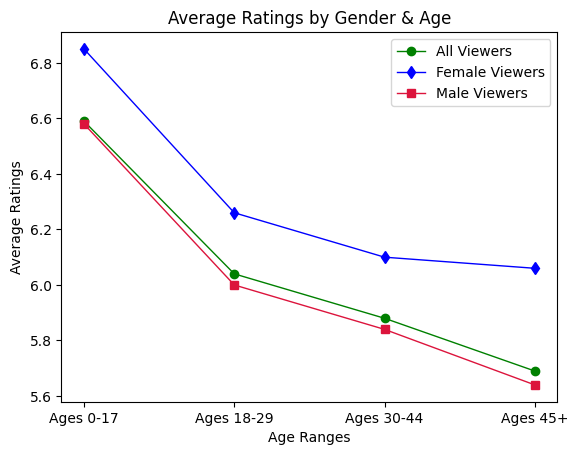

In [33]:
# CREATE VARIABLES FOR LINE GRAPH--------------------------------------
ages = ['Ages 0-17', 'Ages 18-29', 'Ages 30-44', 'Ages 45+']
females = gender_ratings_by_age["Female Ave Rating"]
males = gender_ratings_by_age["Male Ave Rating"]
combinedgender = gender_ratings_by_age["Ave Overall"]

# PLOT GRAPH-----------------------------------------------------------
All_Viewers, = plt.plot(ages, combinedgender, marker="o",color="green", linewidth=1, label="All Viewers")
Female_Viewers, = plt.plot(ages, females, marker="d",color="blue", linewidth=1, label="Female Viewers")
Male_Viewers, = plt.plot(ages, males, marker="s",color="crimson", linewidth=1, label="Male Viewers")

plt.legend(handles=[All_Viewers, Female_Viewers, Male_Viewers], loc="best")
plt.xlabel("Age Ranges")
plt.ylabel("Average Ratings")
plt.title("Average Ratings by Gender & Age")
plt.show()

In [34]:
#CALCULATE OVERALL AVERAGE VOTES BY GEOGRAPHY------------------------------------
US_ratings = ratings_data_raw['us_voters_rating']
ave_US_ratings = US_ratings.mean()

non_US_ratings = ratings_data_raw['non_us_voters_rating']
ave_non_US_ratings = non_US_ratings.mean()

ratingslists_by_geography = pd.DataFrame({"Ave US Voter Rating": US_ratings,
                                          "Ave non-US Voter Rating": non_US_ratings})

ratings_by_geography = ratingslists_by_geography.mean()
round(ratings_by_geography,2)

Ave US Voter Rating        5.97
Ave non-US Voter Rating    5.78
dtype: float64